## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\fairo\Downloads\London Airbnb'

In [4]:
df = pd.read_csv(os.path.join(path, 'listings_clean.csv' ), index_col = 0)

In [5]:
df.shape

(83850, 15)

In [25]:
df.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,65,1,16,3,347
1,100,3,85,1,203
2,300,3,41,14,269
3,175,30,93,1,329
4,65,4,28,1,2


### 2. The elbow technique

In [26]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [27]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-7414050137.4614,
 -5192707350.579827,
 -3636676960.5564885,
 -2366481490.2133713,
 -1567987822.4329286,
 -1272025822.3661816,
 -1040050971.6485677,
 -917482465.1737454,
 -790299796.454873]

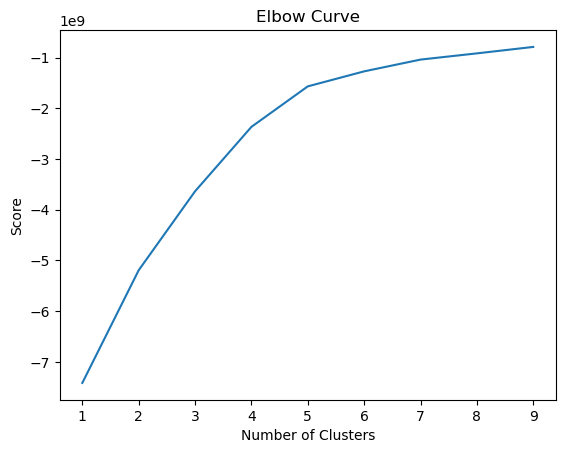

In [28]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve start to straighten out in 5 so it seems that the optimal count of clusters here is 5.

### 3. k-means clustering

In [29]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)


In [30]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [31]:
df['clusters'] = kmeans.fit_predict(df)

In [32]:
df.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,65,1,16,3,347,3
1,100,3,85,1,203,3
2,300,3,41,14,269,3
3,175,30,93,1,329,3
4,65,4,28,1,2,0


In [33]:
df['clusters'].value_counts()

0    54619
3    25985
4     2036
2     1160
1       50
Name: clusters, dtype: int64

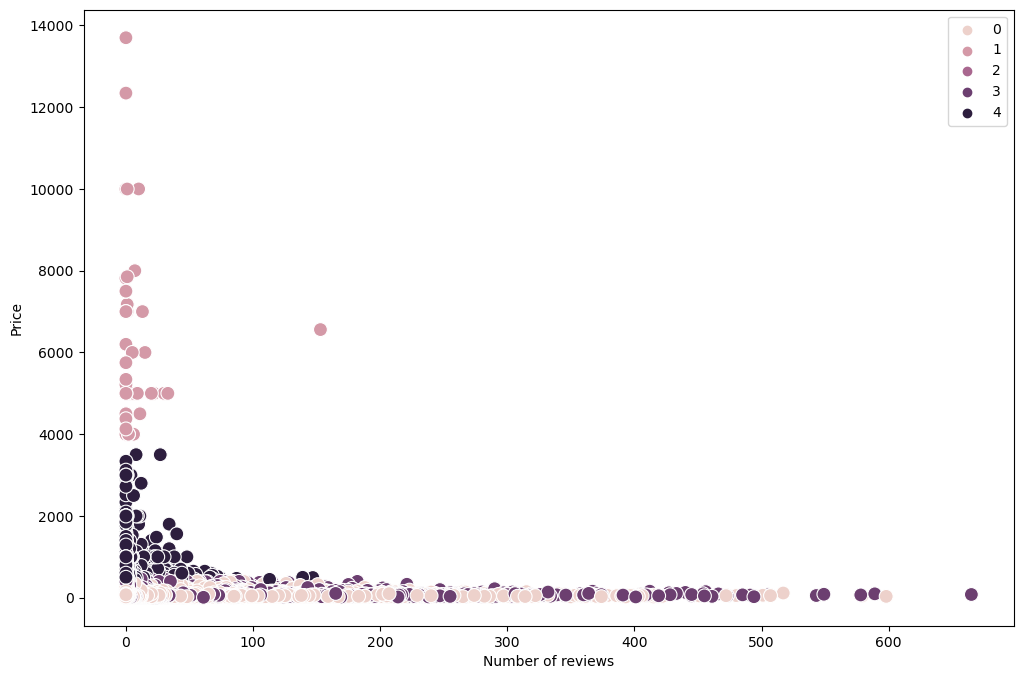

In [34]:
# Plot the clusters for the "pricet" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of reviews') 
plt.ylabel('Price') 
plt.show()

Like I said in the previous tasks, there are many outliers in the price column, whcih is very clear in the scatterpltot, between 0 and 2000 we can't really differentiate anything.

The first well defined cluster (1) concerns Airbnb prices that are 4000+, which doesn't seem to be influenced by the number of reviews, which make sens, the luxurious and very expensive listings generally doesn't have many reviews (for many reasons). 

The second cluster (4) concerns Airbnb prices between 1000 & 4000, which still are very expensive, have a small positive relationship with the number of reviews.
 
The last remaining clusters are pretty broad.

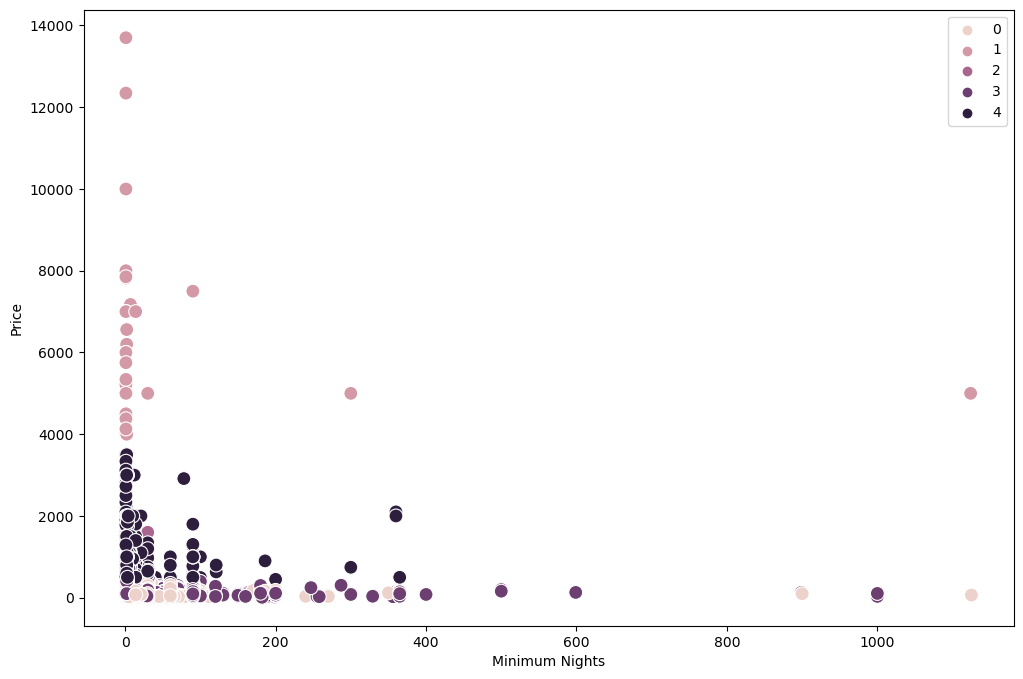

In [35]:
# Plot the clusters for the "minimum_nights" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['minimum_nights'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Minimum Nights') 
plt.ylabel('Price') 
plt.show()

No particular new insights or trends between these two variables can be seen here. 

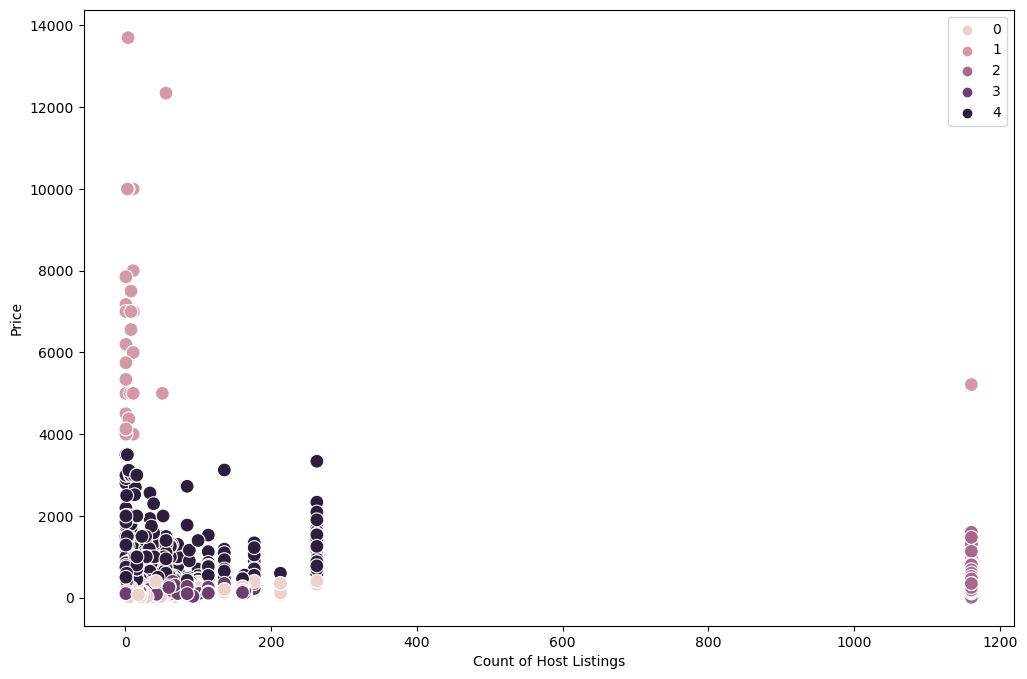

In [36]:
# Plot the clusters for the "calculated_host_listings_count" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['calculated_host_listings_count'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Count of Host Listings') 
plt.ylabel('Price') 
plt.show()

3 clusters (0, 3 & 4) are well defined, Airbnb prices that are below 4000 seem to have a small to moderate postive reationship with the number of listings a host has. 



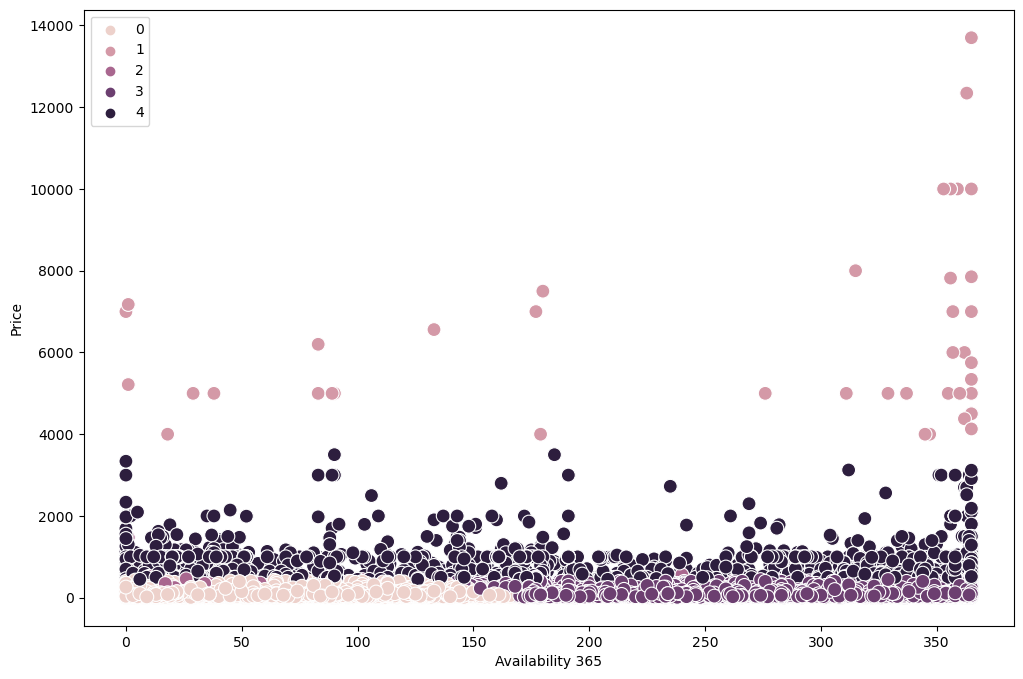

In [37]:
# Plot the clusters for the "availability_365" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Availability 365') 
plt.ylabel('Price') 
plt.show()

The clusters span through all values of the availability variable in no specific trend.

In [38]:
df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'Light pink'

In [41]:
df.groupby('cluster').agg({'number_of_reviews':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'calculated_host_listings_count':['mean', 'median'],
                          'availability_365':['mean', 'median'],
                          'price':['mean', 'median']})

number_of_reviews        minimum_nights         \
                         mean median           mean median   
cluster                                                      
Light pink          14.292371    4.0       3.552024    2.0   
black                4.109037    0.0       5.792731    3.0   
dark purple         22.773215    6.0       5.451645    2.0   
pink                 7.260000    0.0      35.920000    1.0   
purple               0.934483    0.0       2.650862    3.0   

            calculated_host_listings_count         availability_365         \
                                      mean  median             mean median   
cluster                                                                      
Light pink                        6.490141     1.0        32.764276    4.0   
black                            53.672888    13.0       164.839882  145.5   
dark purple                      12.864999     3.0       292.219858  313.0   
pink                             33.960000     4.5       269.160000  354.0   
purple                         1161.000000  1161.0        19.079310    0.0   

                   price          
                    mean  median  
cluster                           
Light pink     91.296142    75.0  
black         758.856090   600.0  
dark purple   116.029748    90.0  
pink         6779.960000  5875.0  
purple        271.823276   239.0

The next step I think is repeating all this with a subset that doesn't contain outliers and see if it gives another picture and/or insight, and if the number or nature of the clusters change in any meaningful way. 